## Importing packages

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import math
from collections import Counter
from IPython.display import display_html
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler

## Importing data from the saved data in "Bachelor code to save data" code

In [2]:
%%time
TF_100events_combined = pd.read_csv("Events_100_edges_TF_100events_combined_pt1_125.csv")
TF_95events_combined = pd.read_csv("Events_100_edges_TF_95events_combined_pt1_125.csv")
TF_5events_combined = pd.read_csv("Events_100_edges_TF_5events_combined_pt1_125.csv")
print(len(TF_100events_combined),len(TF_95events_combined),len(TF_5events_combined),len(TF_95events_combined)+len(TF_5events_combined))

TF_50events_combined = pd.read_csv("Events_50_edges_TF_50events_combined_pt1_125.csv")
TF_47events_combined = pd.read_csv("Events_50_edges_TF_47events_combined_pt1_125.csv")
TF_3events_combined = pd.read_csv("Events_50_edges_TF_3events_combined_pt1_125.csv")
print(len(TF_50events_combined),len(TF_47events_combined),len(TF_3events_combined),len(TF_47events_combined)+len(TF_3events_combined))

TF_50events_all_combined = pd.read_csv("Events_50_edges_TF_50events_combined_pt1_all.csv")
TF_47events_all_combined = pd.read_csv("Events_50_edges_TF_47events_combined_pt1_all.csv")
TF_3events_all_combined = pd.read_csv("Events_50_edges_TF_3events_combined_pt1_all.csv")
print(len(TF_50events_all_combined),len(TF_47events_all_combined),len(TF_3events_all_combined),len(TF_47events_all_combined)+len(TF_3events_all_combined))

TF_10events_combined = pd.read_csv("Events_10_edges_TF_10events_combined_pt1_125.csv")
TF_9events_combined = pd.read_csv("Events_10_edges_TF_9events_combined_pt1_125.csv")
TF_1events_combined = pd.read_csv("Events_10_edges_TF_1events_combined_pt1_125.csv")
print(len(TF_10events_combined),len(TF_9events_combined),len(TF_1events_combined),len(TF_9events_combined)+len(TF_1events_combined))

TF_10events_all_combined = pd.read_csv("Events_10_edges_TF_10events_combined_pt1_all.csv")
TF_9events_all_combined = pd.read_csv("Events_10_edges_TF_9events_combined_pt1_all.csv")
TF_1events_all_combined = pd.read_csv("Events_10_edges_TF_1events_combined_pt1_all.csv")
print(len(TF_10events_all_combined),len(TF_9events_all_combined),len(TF_1events_all_combined),len(TF_9events_all_combined)+len(TF_1events_all_combined))

267388 254467 12921 267388
136144 128921 7223 136144
424277 401593 22684 424277
28390 25577 2813 28390
88261 79990 8271 88261
Wall time: 3.42 s


## Making a MLP function where one can change hidden_layer_size and max_iter

In [3]:
def MLP_func(data_train,data_test,hidden_layer,max_iter):
    X_train = data_train[["z_node1","z_node2","r_node1","r_node2","phi_node1","phi_node2","x_node1","x_node2","y_node1","y_node2"]].copy()
    Y_train = data_train.Y_k
    X_test = data_test[["z_node1","z_node2","r_node1","r_node2","phi_node1","phi_node2","x_node1","x_node2","y_node1","y_node2"]].copy()
    Y_test = data_test.Y_k
    model = MLPClassifier(hidden_layer_sizes = hidden_layer,random_state=1, max_iter = max_iter)
    model.fit(X_train,Y_train)
    prop_train = model.predict(X_train)
    score_train = model.score(X_train,Y_train)
    prop_test = model.predict(X_test)
    score_test = model.score(X_test,Y_test)
    return model , X_train , Y_train , X_test, Y_test ,prop_train , score_train , prop_test , score_test

In [4]:
%%time
model_10 , X_train_9 , Y_train_9 , X_test_1 , Y_test_1 ,prop_train_9 , score_train_9 , prop_test_1 , score_test_1 = MLP_func(TF_9events_combined,TF_1events_combined,(200,100),300)

Wall time: 22.5 s


### Loking at the results of the MLP function

In [5]:
%%time
def MLP_output_func(X_train , Y_train , X_test , Y_test ,prop_train , score_train , prop_test , score_test):
    True_predicted_train = Counter(prop_train)[1]
    False_predicted_train = Counter(prop_train)[0]
    print("Input data",len(Y_train),"Output data",len(prop_train))
    print("True_input vs True_output...:",Counter(Y_train)[1],"vs",True_predicted_train)
    print("False_input vs False_output...:",Counter(Y_train)[0],"vs",False_predicted_train)
    print(round(score_train,4)*100,"%")
    True_predicted_test = Counter(prop_test)[1]
    False_predicted_test = Counter(prop_test)[0]
    print(len(prop_test))
    print("True_input vs True_output...:",Counter(Y_test)[1],"vs",True_predicted_test)
    print("False_input vs False_output...:",Counter(Y_test)[0],"vs",False_predicted_test)
    print(round(score_test,4)*100,"%")


Wall time: 0 ns


In [6]:
%%time
MLP_output_func(X_train_9 , Y_train_9 , X_test_1 , Y_test_1 ,prop_train_9 , score_train_9 , prop_test_1 , score_test_1)

Input data 25577 Output data 25577
True_input vs True_output...: 13875 vs 14465
False_input vs False_output...: 11702 vs 11112
96.12 %
2813
True_input vs True_output...: 1512 vs 1554
False_input vs False_output...: 1301 vs 1259
96.52 %
Wall time: 15 ms


## PLoting the results from the MLP

In [7]:
def plot_func(X_test, prop_test, XY, ZR, figure_size):
    X_test_index = X_test.reset_index().drop("index",axis = 1)
    X_true = []
    for i, idx in enumerate(range(len(prop_test))):
        if prop_test[i] == 1:
            X_true.append(X_test_index.loc[idx])
    plt.rcParams['figure.figsize'] = figure_size
    edges = np.array(X_true)
    xyz = edges
    print(len(xyz))
    for i in range(len(xyz)):
        if XY == True:
            px = np.array([xyz[i,6],xyz[i,7]])
            py = np.array([xyz[i,8], xyz[i,9]])
            plt.scatter(px,py, s = 10, color = 'black')
            plt.plot(px,py, '--', alpha = 0.3, color = 'b')
            plt.xlim(-1100,1100)
            plt.ylim(-1100,1100)
        elif ZR == True:
                px = np.array([xyz[i,0],xyz[i,1]])
                py = np.array([xyz[i,2], xyz[i,3]])
                plt.scatter(px,py, s = 10, color = 'black')
                plt.plot(px,py, '--', alpha = 0.3, color = 'b')

1554
Wall time: 2.52 s


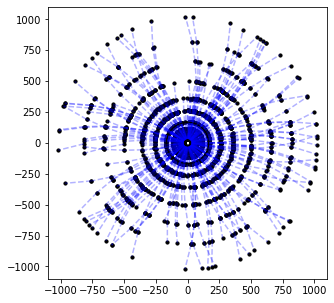

In [8]:
%%time
plot_func(X_test_1, prop_test_1, True, False, [5,5])

1554
Wall time: 7.79 s


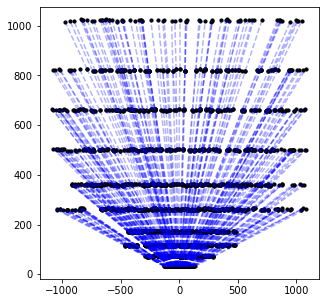

In [9]:
%%time
plot_func(X_test_1, prop_test_1, False, True, [5,5])

In [10]:
def segments(nodes,edges,prop_test):
    edges_TF = edges
    nodes_feat = nodes[["z_node1","z_node2","r_node1","r_node2","phi_node1","phi_node2","x_node1","x_node2","y_node1","y_node2"]].copy()
    guess = prop_test
    Ytrue = []
    for i, idx in enumerate(range(len(edges))):
        if edges[i] == 1:
            Ytrue.append(nodes_feat.loc[idx])
    true_yk = pd.DataFrame(Ytrue).reset_index() 
    X_true = []
    for i, idx in enumerate(range(len(nodes))):
        if guess[i] == 1:
            X_true.append(nodes.loc[idx])
    truedf = pd.DataFrame(X_true).reset_index()
    segment = []
    for i, idx in enumerate(range(len(truedf))):
        for k, kdx in enumerate(range(len(truedf))):
            if i <= 2500 and truedf.z_node2[i] == truedf.z_node1[k] and truedf.y_node2[i] == truedf.y_node1[k] and truedf.x_node2[i] == truedf.x_node1[k]:
                segment.append([idx, kdx])
            if i > 2500 and truedf.z_node2[k] == truedf.z_node1[i] and truedf.y_node2[k] == truedf.y_node1[i] and truedf.x_node2[k] == truedf.x_node1[i]:
                segment.append([kdx, idx])
    seg1 = []
    for i in range(len(segment)):
        for k in range(len(segment)):
            if segment[i][1] == segment[k][0]:
                seg1.append([segment[i][0],segment[i][1],segment[k][1]])
    seg2 = []
    for i in range(len(seg1)):
        for k in range(len(seg1)):
            if seg1[i][2] == seg1[k][0]:
                seg2.append([seg1[i][0],seg1[i][1], seg1[k][0],seg1[k][1],seg1[k][2]])
    seg3 = []
    for i in range(len(seg2)):
        for k in range(len(seg2)):
            if seg2[i][4] == seg2[k][0]:
                seg3.append([seg2[i][0], seg2[i][1], seg2[i][2], seg2[i][3],seg2[k][0], seg2[k][1],seg2[k][2],seg2[k][3],seg2[k][4]])
    return seg1 , seg2 , seg3 ,truedf , true_yk

In [11]:
%%time
seg1_E1 , seg2_E1 , seg3_E1 , truedf_E1_all , true_yk_E1_all = segments(X_test_1,Y_test_1,prop_test_1)

Wall time: 29.7 s


In [15]:
%%time
def purity_test(edges_TF,prop_test,score_test):
    guess = prop_test
    score = score_test
    True_idx = []
    for i, idx in enumerate(edges_TF):
        if edges_TF[i] == 1:
            True_idx.append(guess[i])
    purity = sum(True_idx)/sum(edges_TF)
    return guess , score , True_idx , purity 

guess_E1_all , score_E1_all , true_idx_E1_all , purity_E1_all = purity_test(Y_test_1,prop_test_1,score_test_1)
print(score_E1_all)
print(purity_E1_all)


0.965161749022396
0.9814814814814815
Wall time: 7.98 ms


Text(0.5, 1.0, 'Tracks of 50 particles with 10 hits')

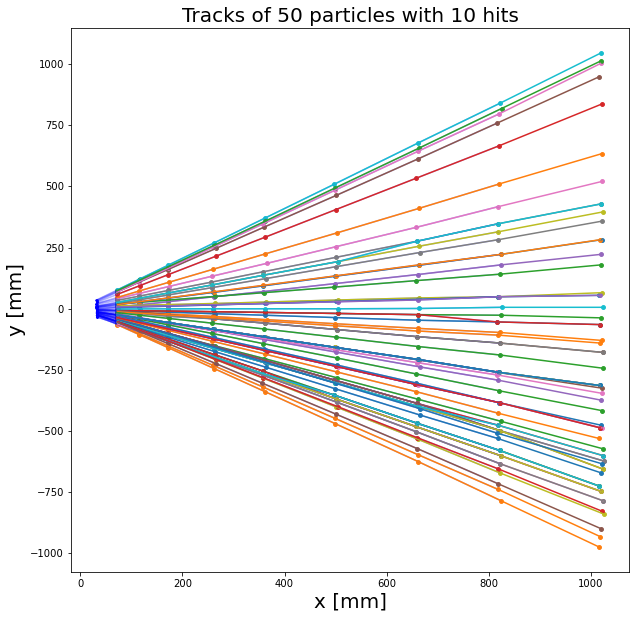

In [17]:
plt.figure(figsize=(10,10))
for i in seg3_E1:
    plt.plot(truedf_E1_all.r_node1[i], truedf_E1_all.z_node1[i], color = 'blue', alpha = 0.3)
    plt.scatter(truedf_E1_all.r_node1[i], truedf_E1_all.z_node1[i], color = 'blue', s = 2)
    plt.scatter(truedf_E1_all.r_node2[i], truedf_E1_all.z_node2[i], s = 15)
    plt.plot(truedf_E1_all.r_node2[i], truedf_E1_all.z_node2[i])
plt.xlabel('x [mm]', fontsize = 20)
plt.ylabel('y [mm]', fontsize = 20)
plt.title('Tracks of 50 particles with 10 hits', fontsize = 20)